# Apporaching categorical variables

## What are categorical variables?


Categorical variables/features are any feature type can be classified into two major types:

 • Nominal
 
 • Ordinal
 
 
**Nominal variables** are variables that have two or more categories which do not have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable. 


**Ordinal variables**, on the other hand, have “levels” or categories with a particular order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important. 

As far as definitions are concerned, we can also categorize categorical variables as **binary**, i.e., a categorical variable with only two categories. Some even talk about a type called **cyclic** for categorical variables. Cyclic variables are present in “cycles” for example, days in a week: Sunday, Monday, Tuesday, Wednesday, Thursday, Friday and Saturday. After Saturday, we have Sunday again. This is a cycle. Another example would be hours in a day if we consider them to be categories. 


We will be using **cat-in-the-dat** from Categorical Features Encoding Challenge from Kaggle. 

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("train.csv")

In [2]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


### The Dataset consist of all kinds of categorical variables:
* **Nominal**
* **Ordinal**
* **Cyclical**
* **Binary**


It is abinary classification problem.

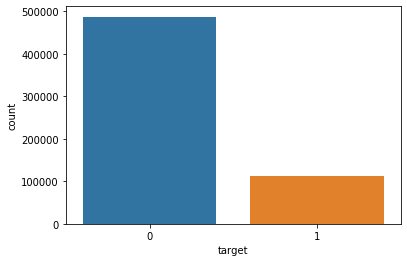

In [3]:
import seaborn as sns
sns.countplot(x = "target", data  = df)

~As we know that the target is skewed so we will use **ROC Curve** to evaluate result.

Overall, there are: 

    • Five binary variables 
    • Ten nominal variables 
    • Six ordinal variables 
    • Two cyclic variables 
    • And a target variable 
    
ord_2 feature consists of six different categories: 

    • Freezing 
    • Warm 
    • Cold 
    • Boiling Hot 
    • Hot 
    • Lava Hot
    
We have to know that computers do not understand text data and thus, we need to convert these categories to numbers. A simple way of doing this would be to create a dictionary that maps these values to numbers starting from 0 to N-1, where N is the total number of categories in a given feature.

In [4]:
mapping = {
    "Freezing" : 0,
    "Warm" : 1,
    "Cold" : 2,
    "Boiling Hot" : 3,
    "Hot" : 4,
    "Lava Hot" : 5
}

In [5]:
#Value count before mapping
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

Now we can read the dataset and convert these categories to numbers easily.

In [6]:
df.loc[ :, "ord_2"] = df.ord_2.map(mapping)

In [7]:
#Value count after mapping
df.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

In [8]:
df.ord_2.isnull().sum()

18075

This type of encoding of categorical vairbales is known as **Label Encoding** i.e encoding every category as a numerical label.

In [9]:
#LabelEncoder from scikit-learn.
import pandas as pd
from sklearn import preprocessing 

#read the data 
df = pd.read_csv("train.csv")

#fill NaN values in ord_2 column
#df.loc[:,"ord_2"] = df.ord.fillna("NONE")

# initalize LabelEncoder
df.loc[:,"ord_2"] = df.ord_2.fillna("NONE")

#initialize LabelEnocder
lbl_enc = preprocessing.LabelEncoder()

#fit label encoder and transfrom values on ord_2 column
# P.S : do not use this directly. fit first, then transform
df.loc[:,"ord_2"] = lbl_enc.fit_transform(df.ord_2.values)


You first need to fillna from pandas cause LabelEncoder from scikit-learn does not handle NAN values and ord_2 column have NAN values.

**We can use Label Encoding directly in many tree-based models:**
    * Decision trees
    * Random forest
    * Extra Trees
    * Or any kind of boosted trees model
         * XGBoost
         * GBM
         * LightGBM
         
This type of encoding cannot be used in linear models, SVM or neural network as they expect data to be **normalized**

For these types of models, we can binarize the data.

* Freezing --> 0 --> 0 0 0 
* Warm --> 1 --> 0 0 1 
* Cold --> 2 --> 0 1 0
* Boiling Hot --> 3 --> 0 1 1 
* Hot --> 4 --> 1 0 0 
* Lava Hot --> 5 --> 1 0 1 
   
   

This is just converting the categories to numbers and then converting them to their binary representation.

We are thus splitting one feature into three (in this case) features (or columns). If we have more categories, we might end up splitting into a lot more columns. 

It becomes easy to store lots of binarized variables like this if we store them in a **sparse format.** 

### sparse format
A sparse format is nothing but a representation or way of storing data in memory in which you do not store all the values but only the values that matter. In the case of binary variables described above, all that matters is where we have ones (1s). It’s difficult to imagine a format like this but should become clear with an example. Let’s assume that we are provided with only one feature in the dataframe above:

ord_2

| Index | Feature 
| --- | --- | 
| 0 | Warm |
| 1 | Hot  |
| 2 | Lava hot |


Currently, we are looking at only three samples in the daatset. Let's convert this to binary representation where we have three for each sample.

These three items are the three features.

| Index | Feature_0 | Feature_1 | Feature_2
| --- | --- | --- | --- |
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | 0 |
| 2 | 1 | 0 | 1 |


So, our feature are stored in a matrix which has 3 rows and 3 columns. Each element of matrix occupies 8 bytes. So, our total memory requirement for this array is 8x3x3 = 72 bytes

We can also check this using python snippet.

In [10]:
import numpy as np 

#create our example feature matrix 
example = np.array( [ [0, 0, 1], [1, 0, 0], [1, 0, 1] ] ) 

#print size in bytes 

print(example.nbytes)

72


As mentioned before we are only interested in 1s. 0s are not that important because anything multiplied with 0 will be zero and 0 added/subtracted to/from anything doesn’t make any difference. One way to represent this matrix only with ones would be some kind of dictionary method in which keys are indices of rows and columns and value is 1:

* (0, 2) 1 
* (1, 0) 1 
* (2, 0) 1 
* (2, 2) 1 

The total memory used will be 8x4 = 32 bytes.

Any numpy array can be converted to a sparse matrix by simple python code.

In [11]:
import numpy as np
from scipy import sparse 


#create our example feature matrix

example = np.array(
    [
     [0,0,1],
     [1,0,0],
     [1,0,1]   
    ]
)

# convert numpy array to saprse CSR matrix 
sparse_example = sparse.csr_matrix(example)


#print size of this sparse matrix 
print(sparse_example.data.nbytes)

32


The total size of the sparse csr matrix is the sum of three values.

In [12]:
print(
    sparse_example.data.nbytes + 
    sparse_example.indptr.nbytes + 
    sparse_example.indices.nbytes
)

64


Even though the sparse representation of binarized features takes much less memory than its dense representation, there is another transformation for categorical variable that takes even less memory. That is known as **One Hot Encoding.**

One hot encoding is a binary encoding too in the sense that there are only two values, 0s and 1s. However, it must be noted that it’s not a binary representation. Its representation can be understood by looking at the following example. 

Suppose we represent each category of the ord_2 variable by a vector. This vector is of the same size as the number of categories in the ord_2 variable. In this specific case, each vector is of size six and has all zeros except at one position. Let’s look at this particular table of vectors. 

|  |  |  |  |  |  |
| --- | --- | --- | --- | --- | --- | 
| Freezing | 0 | 0 | 0 | 0 | 0 | 1 |
| Warm | 0 | 0 | 0 | 0 | 1 | 0 |
| Cold | 0 | 0 | 0 | 1 | 0 | 0 |
| Boiling Hot | 0 | 0 | 1 | 0 | 0 | 0 | 
| Hot | 0 | 1 | 0 | 0 | 0 | 0 |
| Lava Hot | 1 | 0 | 0 | 0 | 0 | 0 |


We see that the size of vectors is 1x6, i.e. there are six elements in the vector. Where does this number come from? If you look carefully, you will see that there are six categories, as mentioned before. When one-hot encoding, the vector size has to be same as the number of categories we are looking at. Each vector has a 1 and rest all other values are 0s. Now, let’s use these features instead of the binarized feature as before and see how much memory can we save. 


If you remember the old data, it looked as follows:


| Index | Feature |
| --- | --- |
| 0 | Warm |
| 1 | Hot | 
| 2 | Lava Hot | 

And we had three feature for each sample. But one-hot vector in this case are size 6. Thus we have 6 feature instead of 3.

| Index  | F_0  | F_1  | F_2  | F_3 | F_4  | F_5 |
| --- | --- | --- | --- | --- | --- | --- |   
| 0 | 0 | 0 | 0 | 0 | 1 | 0 |
| 1 | 0 | 1 | 0 | 0 | 0 | 0 |
| 2 | 1 | 0 | 0 | 0 | 0 | 0 |



In [13]:
import numpy as np 
from scipy import sparse 

#create binary matrix 
example = np.array( [ [0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0] ] ) 

#print size in bytes 

print(f"Size of dense array: {example.nbytes}") 

#convert numpy array to sparse CSR matrix 
sparse_example = sparse.csr_matrix(example) 

#print size of this sparse matrix 

print(f"Size of sparse array: {sparse_example.data.nbytes}") 

full_size = ( sparse_example.data.nbytes + sparse_example.indptr.nbytes + sparse_example.indices.nbytes ) 
#print full size of this sparse matrix 
print(f"Full size of sparse array: {full_size}") 

Size of dense array: 144
Size of sparse array: 24
Full size of sparse array: 52


Thus we can see that the size of the parse matrix for one-hot encoding is small as compare to the size of the sparse matrix for binarization.

The difference is more noteable when we take a data of much bigger size.



* These three methods are the most important ways to handle categorical variables. 
* There are, however, many other different methods you can use to handle categorical variables. 
* An example of one such method is about converting categorical variables to numerical variables. 
* Suppose we go back to the categorical features dataframe (original cat-in-the-datii) that we had. How many ids do we have in the dataframe where the value of ord_2 is Boiling Hot? We can easily calculate this value by calculating the shape of the dataframe where ord_2 column has the value Boiling Hot. 

In [14]:
#read the data 
df = pd.read_csv("train.csv")

df[df.ord_2 == "Boiling Hot"].shape

(84790, 25)

We can see that there are 84790 rows which have Boiling Hot as value. We can calculate number for other categories also

In [15]:
df.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

We can just replace ord_2 column with it's count value. This way we can convert it into numerical form.

We can either : 
* Replace that column by using transform
* or create a new column

In [16]:
df.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

You can add counts of all the features or can also replace them or maybe group by multiple columns and their counts. For example, the following code counts by grouping on ord_1 and ord_2 columns. 

In [17]:
#read the data 
df = pd.read_csv("train.csv")

df.groupby(["ord_1","ord_2"])["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


One more trick is to *create new feature from these categorical variables.*  example for creating new feature from existing feature is given as

In [18]:
df["new_feature"] = (
    df.ord_1.astype(str) 
    + "_"
    + df.ord_2.astype(str)
)

df.new_feature

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

Here, we have combined ord_1 and ord_2 by an underscore, and before that, we convert these columns to string types. Note that NaN will also convert to string. But it’s okay. We can also treat NaN as a new category. Thus, we have a new feature which is a combination of these two features. You can also combine more than three columns or four or even more. 

In [19]:
df.drop(["new_feature"],axis = 1 ,inplace = True)

In [20]:
df["new_feature"] = (df.ord_1.astype(str)  + "_" + df.ord_2.astype(str) + "_"  + df.ord_3.astype(str) ) 
df.new_feature

0                 Contributor_Hot_c
1                Grandmaster_Warm_e
2                    nan_Freezing_n
3                 Novice_Lava Hot_a
4                Grandmaster_Cold_h
                    ...            
599995            Novice_Freezing_a
599996         Novice_Boiling Hot_n
599997       Contributor_Freezing_n
599998                Master_Warm_m
599999    Contributor_Boiling Hot_b
Name: new_feature, Length: 600000, dtype: object

So which categories should we combine? Well, there isn't an easy answer to that. It depends on your data and the types of features. Some domain knowledge might be useful for creating features like this. But if you don’t have concerns about memory and CPU usage, you can go for a greedy approach where you can create many such combinations and then use a model to decide which features are useful and keep them. 

Whenever you get categorical variables, follow these simple steps: 
* fill the NaN values (this is very important!) 
* convert them to integers by applying label encoding using LabelEncoder of scikit-learn or by using a mapping dictionary. If you didn’t fill up NaN values with something, you might have to take care of them in this step
* create onr-hot encoding. Yes , you can skip binarization.
* go for the modeling! i mean the machine learning one . Not the ramp.

Handling NaN value is quite imp and if your did'nt handle it then during scikit-learn's LabelEncoder you will get the error.

**ValueError : y contains previously unseen labels : [nan, nan]**

This means when you are transforming the test data, you have nan value in it and you forget to handle those nan value during training process. 

One simple way to handle nan value is to 

* **drop them** But it is not a good idea. Cause if there is lot of nan value in the data then by dropping it youa re lossing lot of information which is not a good thing to do.

* Another way to handle nan value is to treat them as new category. This the most preferred way of handling nan values.

In [21]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

After filling NaN value it becomes.

In [22]:
df.ord_2.fillna("NONE").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

There are 18075 NaN values which we did'nt consider before.
* With the addition of new category the total number of category are now 7 which was previously 6.
* This is helpful cause now when we bulit a model we will also going to consider nan value. The more relevant information we have the better our model will perform.

* Let’s assume that ord_2 did not have any NaN values. We see that all categories in this column have a significant count. There are no “rare” categories; i.e. the categories which appear only a small percentage of the total number of samples. Now, let’s assume that you have deployed this model which uses this column in production and when the model or the project is live, you get a category in ord_2 column that is not present in train. You model pipeline, in this case, will throw an error and there is nothing that you can do about it. If this happens, then probably something is wrong with your pipeline in production. If this is expected, then you must modify your model pipeline and include a new category to these six categories.

* This new category is known as the “rare” category. A rare category is a category which is not seen very often and can include many different categories. You can also try to “predict” the unknown category by using a nearest neighbour model. Remember, if you predict this category, it will become one of the categories from the training data. 

<img src="img1.jpeg">


* When we have a dataset like as shown in figure 3, we can build a simple model that’s trained on all features except “f3”. Thus, you will be creating a model that predicts “f3” when it’s not known or not available in training. 

* If you have a fixed test set, you can add your test data to training to know about the categories in a given feature. This is very similar to semi-supervised learning in which you use data which is not available for training to improve your model. This will also take care of rare values that appear very less number of times in training data but are in abundance in test data. Your model will be more robust. 

* Many people think that this idea overfits. It may or may not overfit. There is a simple fix for that. If you design your cross-validation in such a way that it replicates the prediction process when you run your model on test data, then it’s never going to overfit. It means that the first step should be the separation of folds, and in each fold, you should apply the same pre-processing that you want to apply to test data. Suppose you want to concatenate training and test data, then in each fold you must concatenate training and validation data and also make sure that your validation dataset replicates the test set. In this specific case, you must design your validation sets in such a way that it has categories which are “unseen” in the training set. Figure 4: A simple concatenation of training and test sets to learn about the categories

<img src="img2.jpeg">

In [23]:
import pandas as pd 
from sklearn import preprocessing 

#read training data 
train = pd.read_csv("train.csv") 

#read test data 
test = pd.read_csv("test.csv") 

#create a fake target column for test data 
#since this column doesn't exist 
test.loc[:, "target"] = -1 

#concatenate both training and test data 
data = pd.concat([train, test]).reset_index(drop=True) 


#make a list of features we are interested in 
#id and target is something we should not encode 
features = [x for x in train.columns if x not in ["id", "target"]] 

#loop over the features list 

for feat in features:
    
    #create a new instance of LabelEncoder for each feature 
    lbl_enc = preprocessing.LabelEncoder() 
    
    #note the trick here 
    #since its categorical data, we fillna with a string 
    #and we convert all the data to string type 
    #so, no matter its int or float, its converted to string 
    #int/float but categorical!!! 
    
    temp_col = data[feat].fillna("NONE").astype(str).values 
    
    #we can use fit_transform here as we do not 
    #have any extra test data that we need to 
    #transform on separately 
    
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col) 
    
    #split the training and test data again 
    
    train = data[data.target != -1].reset_index(drop=True) 
    test = data[data.target == -1].reset_index(drop=True) 

In [24]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0,0,3,5,3,6,...,27,2,0,3,3,21,57,5,5,0
1,1,1,1,0,0,2,3,4,0,5,...,2113,2,2,6,5,24,151,6,9,0
2,2,0,1,0,0,0,3,1,3,0,...,1400,2,4,2,14,16,106,4,11,0
3,3,2,0,0,0,0,3,0,3,3,...,2168,0,5,4,1,2,46,2,5,0
4,4,0,2,0,2,0,3,6,3,2,...,1748,2,2,1,8,2,51,4,3,0


In [25]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,600000,0,0,0,0,2,0,2,0,3,...,2197,2,5,0,6,21,147,2,11,-1
1,600001,0,0,0,0,2,3,0,4,6,...,1107,0,5,1,14,13,46,1,10,-1
2,600002,0,0,0,0,2,0,0,0,6,...,812,0,1,6,9,13,12,1,8,-1
3,600003,1,0,0,0,0,3,2,0,2,...,996,0,1,3,13,1,0,0,8,-1
4,600004,0,0,1,0,2,3,0,5,3,...,371,0,0,4,15,9,14,2,5,-1


This trick works when we have a problem wherre we already know the test dataset.

In our case cat-in-the-dat datset we already have unknowns in ord_2 colmns

In [26]:
df.ord_2.fillna("NONE").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

* We can treat “NONE” as unknown. So, if during live testing, we get new categories that we have not seen before, we will mark them as “NONE”. 

* This is very similar to natural language processing problems. We always build a model based on a fixed vocabulary. Increasing the size of the vocabulary increases the size of the model. Transformer models like BERT are trained on ~30000 words (for English). So, when we have a new word coming in, we mark it as UNK (unknown). 

* So, you can either assume that your test data will have the same categories as training or you can introduce a rare or unknown category to training to take care of new categories in test data. Let’s see the value counts in ord_4 column after filling NaN values: 

In [27]:
df.ord_4.fillna("NONE").value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

* We see that some values appear only a couple thousand times, and some appear almost 40000 times. NaNs are also seen a lot.

* We can now define our criteria for calling a value “rare”. Let’s say the requirement for a value being rare in this column is a count of less than 2000. So, it seems, J and L can be marked as rare values. With pandas, it is quite easy to replace categories based on count threshold. Let’s take a look at how it’s done. 

In [28]:
df.ord_4 = df.ord_4.fillna("NONE")
df.loc[
    df["ord_4"].value_counts()[df["ord_4"]].values < 2000,
    "ord_4"
] = "RARE"

df.ord_4.value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64

Now when it come to test dataset. All the new and unseen categories will be mapped to "RARE" and all the missing value will be mapped to "NONE".